In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from random import randint
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir='F:\chest_xray'
local_weight_file='Weights_Inception.h5'
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')
sample_image_pneumonia=os.listdir(os.path.join(train_dir,'PNEUMONIA'))
sample_image_healthy=os.listdir(os.path.join(train_dir,'NORMAL'))


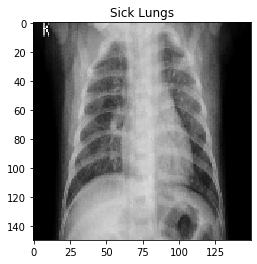

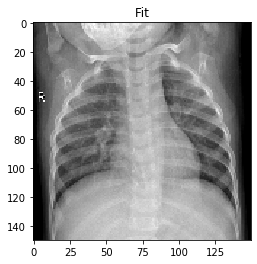

In [3]:
sample_image_pnue=sample_image_pneumonia[randint(0,(len(sample_image_pneumonia)-1))]
sample_image_normal=sample_image_healthy[randint(0,(len(sample_image_healthy)-1))]

img_to_array_sick=cv2.imread(os.path.join(os.path.join(train_dir,'PNEUMONIA'),sample_image_pnue))
img_to_array_fit=cv2.imread(os.path.join(os.path.join(train_dir,'NORMAL'),sample_image_normal))

plt.imshow(cv2.resize(img_to_array_sick,(150,150)))
plt.title("Sick Lungs")
plt.show()

plt.imshow(cv2.resize(img_to_array_fit,(150,150)))
plt.title("Fit")
plt.show()

In [4]:
weights_file='Weigths_Inception.h5'
pre_trained_model=InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)
pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [5]:
last_layer=pre_trained_model.get_layer('mixed7')
last_output=last_layer.output

In [6]:
print(last_layer.output_shape)

(None, 7, 7, 768)


In [7]:
x=layers.Flatten()(last_output)
x=layers.Dense(1024,activation='relu')(x)
x=layers.Dropout(0.3)(x)
x=layers.Dense(1,activation='sigmoid')(x)

model=Model(pre_trained_model.input,x)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   samplewise_center=True,samplewise_std_normalization=True)
test_datagen = ImageDataGenerator(rescale = 1./255,samplewise_center=True,samplewise_std_normalization=True)
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',target_size=(150,150))

Found 2682 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


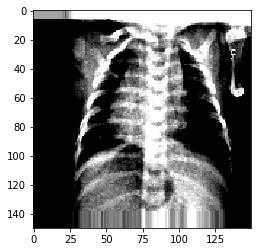

In [9]:
batch=train_generator.next()
data_sample=batch[0]
train_datagen.fit(data_sample)
x,y=train_generator.__getitem__(1)
plt.imshow(x[1])

In [10]:
validation_generator=test_datagen.flow_from_directory(test_dir,batch_size=10,class_mode='binary',target_size=(150,150))

Found 624 images belonging to 2 classes.


In [11]:
history=model.fit(train_generator,validation_data=validation_generator,steps_per_epoch=134,epochs=20,validation_steps=60,verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 134 steps, validate for 60 steps
Epoch 1/20
134/134 - 118s - loss: 0.3906 - accuracy: 0.8787 - val_loss: 1.0257 - val_accuracy: 0.7683
Epoch 2/20
134/134 - 128s - loss: 0.2069 - accuracy: 0.9192 - val_loss: 0.8993 - val_accuracy: 0.7850
Epoch 3/20
134/134 - 106s - loss: 0.1983 - accuracy: 0.9316 - val_loss: 1.0326 - val_accuracy: 0.7950
Epoch 4/20
134/134 - 121s - loss: 0.1846 - accuracy: 0.9365 - val_loss: 0.8653 - val_accuracy: 0.7800
Epoch 5/20
134/134 - 94s - loss: 0.1841 - accuracy: 0.9478 - val_loss: 0.6210 - val_accuracy: 0.8183
Epoch 6/20
134/134 - 95s - loss: 0.1691 - accuracy: 0.9388 - val_loss: 1.0294 - val_accuracy: 0.7850
Epoch 7/20
134/134 - 95s - loss: 0.1501 - accuracy: 0.9470 - val_loss: 1.0782 - val_accuracy: 0.7650
Epoch 8/20
134/134 - 97s - loss: 0.1389 - accuracy: 0.9515 - val_loss: 1.0223 - val_accuracy: 0.7867
Epoch 9/20
134/134 - 95s - loss: 0.1536 - accuracy: 0.9463 - val_loss: 1.1295 - val_accuracy: 0

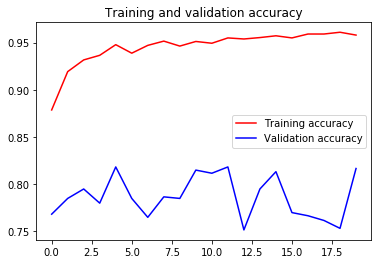

<Figure size 432x288 with 0 Axes>

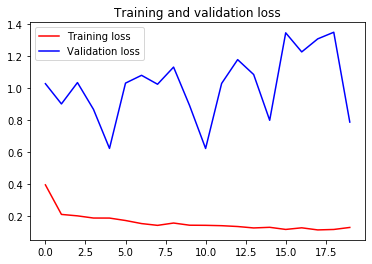

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.plot(epochs,loss, 'r', label="Training loss")
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()